In [1]:
import matplotlib.image as mpimg
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2
#import zipfile
from PIL import Image
  
from keras.callbacks import EarlyStopping
#from keras.preprocessing import image_dataset_from_directory
#from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from keras.utils import image_dataset_from_directory
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras import layers
from tensorflow import keras
#from layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split
#from zipfile import ZipFile
  
import warnings
warnings.filterwarnings('ignore')

In [3]:
#accesing path for dataset
data_path='c:\\ZHAW\\23FS\\KI\\DataForProject'
train_path='c:\\ZHAW\\23FS\\KI\\DataForProject\\Train'

#Variables for resizing
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

#Getting Total Nr of Classes from Train Folder
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [4]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [5]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = train_path + "\\" + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '\\' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [16]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

(X_test, y_test) = (image_data, image_labels)
X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

print("X_train Type:", X_train.dtype)
print("X_valid Type", X_val.dtype)
print("y_train Type", y_train.dtype)
print("y_valid Type", y_val.dtype)
print("X_test Type", X_test.dtype)
print("y_test Type", y_test.dtype)

X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)
X_test.shape (39209, 30, 30, 3)
y_test.shape (39209,)
X_train Type:  float64
X_valid Type float64
y_train Type int32
y_valid Type int32
X_test Type uint8
y_test Type int32


In [19]:
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
print("X_train Type:", X_train.dtype)
print("X_valid Type", X_val.dtype)

X_train Type: float32
X_valid Type float32


In [8]:
image_labels[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


In [16]:
X = (30, 30, 3)

#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [17]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

Epoch 1/15
687/687 [==============================] - 42s 58ms/step - loss: 1.6350 - accuracy: 0.5442 - val_loss: 0.2142 - val_accuracy: 0.9428
Epoch 2/15
687/687 [==============================] - 44s 63ms/step - loss: 0.3120 - accuracy: 0.9039 - val_loss: 0.0869 - val_accuracy: 0.9760
Epoch 3/15
687/687 [==============================] - 42s 61ms/step - loss: 0.1791 - accuracy: 0.9467 - val_loss: 0.0501 - val_accuracy: 0.9867
Epoch 4/15
687/687 [==============================] - 40s 59ms/step - loss: 0.1343 - accuracy: 0.9586 - val_loss: 0.0573 - val_accuracy: 0.9845
Epoch 5/15
687/687 [==============================] - 40s 58ms/step - loss: 0.1145 - accuracy: 0.9668 - val_loss: 0.0349 - val_accuracy: 0.9916
Epoch 6/15
687/687 [==============================] - 41s 60ms/step - loss: 0.0875 - accuracy: 0.9739 - val_loss: 0.0322 - val_accuracy: 0.9913
Epoch 7/15
687/687 [==============================] - 41s 60ms/step - loss: 0.0874 - accuracy: 0.9742 - val_loss: 0.0283 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

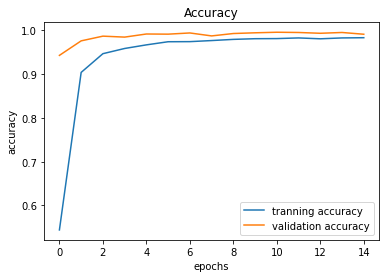

In [19]:
#accuracy
plt.figure(0)
plt.plot(history.history['accuracy'],label='tranning accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

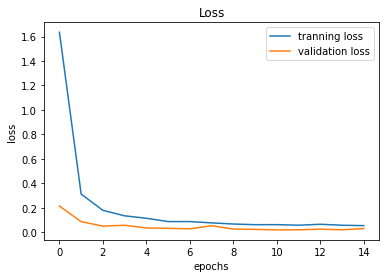

In [20]:
#Loss
plt.plot(history.history['loss'],label='tranning loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show

In [20]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train2 = X_train2.astype(np.float32)
X_val2 = X_val2.astype(np.float32)


print("X_train.shape", X_train2.shape)
print("X_valid.shape", X_val2.shape)
print("y_train.shape", y_train2.shape)
print("y_valid.shape", y_val2.shape)


print("X_train Type:", X_train2.dtype)
print("X_valid Type", X_val2.dtype)
print("y_train Type", y_train2.dtype)
print("y_valid Type", y_val2.dtype)


X_train.shape (27446, 30, 30, 3)
X_valid.shape (11763, 30, 30, 3)
y_train.shape (27446,)
y_valid.shape (11763,)
X_train Type: float32
X_valid Type float32
y_train Type int32
y_valid Type int32


In [21]:
y_train2 = keras.utils.to_categorical(y_train2, NUM_CATEGORIES)
y_val2 = keras.utils.to_categorical(y_val2, NUM_CATEGORIES)

print(y_train2.shape)
print(y_val2.shape)

(27446, 43)
(11763, 43)


In [23]:
X = (30, 30, 3)

#Building the model
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X))
model2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Dropout(rate=0.25))
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(rate=0.5))
model2.add(Dense(43, activation='softmax'))

In [24]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history2 = model2.fit(X_train2, y_train2, epochs=15, validation_split=0.2)

Epoch 1/15
687/687 [==============================] - 39s 54ms/step - loss: 2.2162 - accuracy: 0.4514 - val_loss: 0.7631 - val_accuracy: 0.8124
Epoch 2/15
687/687 [==============================] - 37s 54ms/step - loss: 0.8988 - accuracy: 0.7435 - val_loss: 0.4010 - val_accuracy: 0.8936
Epoch 3/15
687/687 [==============================] - 40s 59ms/step - loss: 0.5679 - accuracy: 0.8356 - val_loss: 0.2456 - val_accuracy: 0.9366
Epoch 4/15
687/687 [==============================] - 39s 57ms/step - loss: 0.3981 - accuracy: 0.8863 - val_loss: 0.2839 - val_accuracy: 0.9138
Epoch 5/15
687/687 [==============================] - 41s 60ms/step - loss: 0.3615 - accuracy: 0.8952 - val_loss: 0.1385 - val_accuracy: 0.9608
Epoch 6/15
687/687 [==============================] - 38s 56ms/step - loss: 0.2847 - accuracy: 0.9171 - val_loss: 0.0835 - val_accuracy: 0.9760
Epoch 7/15
687/687 [==============================] - 41s 59ms/step - loss: 0.2556 - accuracy: 0.9257 - val_loss: 0.1036 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

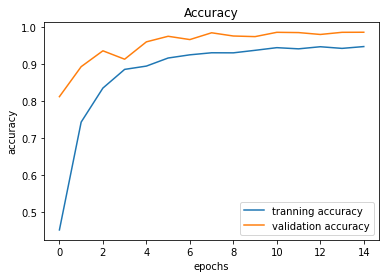

In [26]:
#accuracy
plt.figure(0)
plt.plot(history2.history['accuracy'],label='tranning accuracy')
plt.plot(history2.history['val_accuracy'],label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

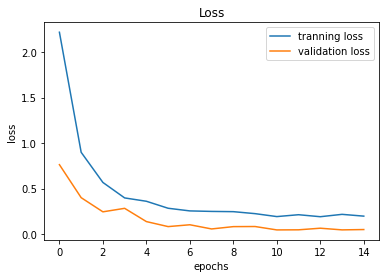

In [27]:
#Loss
plt.plot(history2.history['loss'],label='tranning loss')
plt.plot(history2.history['val_loss'],label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show